In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import timedelta

In [3]:
df = pd.read_csv("dataset.csv", index_col="ts", parse_dates = True)
df.head()

,id,light,temperature,soil_moisture,humidity,api_temp,precipitation,cloud_cover
ts,,,,,,,,
2025-04-01 21:15:00,1,34.3262,33.3125,3262.0,84,27.9,0.1,100
2025-04-01 21:30:00,2,33.9057,33.4688,3232.5,84,27.8,0.1,100
2025-04-01 21:45:00,3,33.2979,33.5938,3218.0,85,27.8,0.1,100
2025-04-01 22:00:00,4,33.6201,33.3281,3211.0,85,27.6,0.0,100
2025-04-01 22:15:00,5,33.2979,33.3438,3203.0,85,27.6,0.0,100


<BarContainer object of 25 artists>

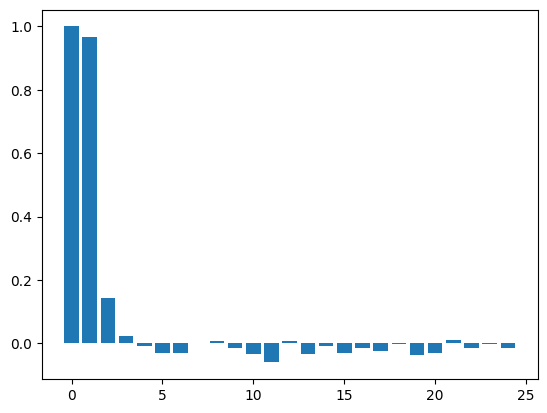

In [4]:
pacf_vals = pacf(df["soil_moisture"])
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [5]:
df_seasonal = seasonal_decompose(df["soil_moisture"], model="additive", period=96)


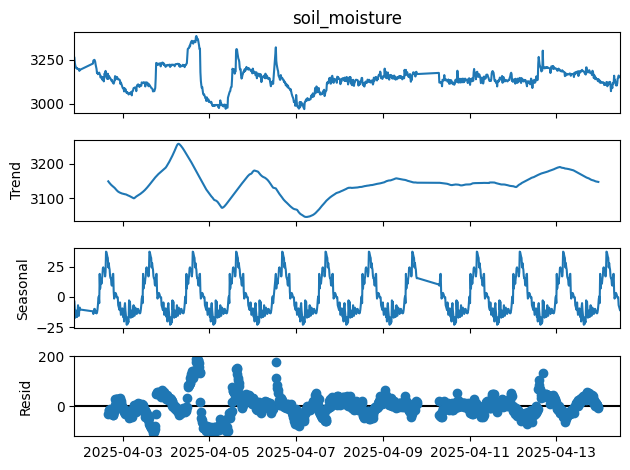

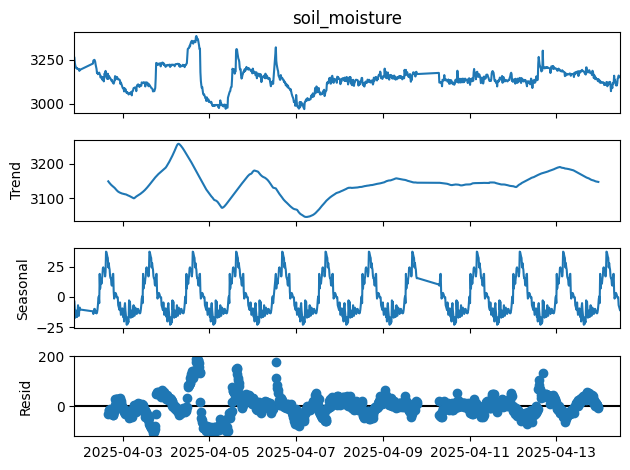

In [6]:
df_seasonal.plot()

In [7]:
train_end = datetime(2025,4,2)
test_end = datetime(2025,4,11)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [8]:
# SARIMAX()